In [4]:
import pandas as pd

# Read Data

In [5]:
#read trainig csv
df = pd.read_csv('master.csv')

#read test csv
df_test = pd.read_csv('test.csv')

#data shape & types
print("rows, col :", df.shape, "\n")
df_test.info()

rows, col : (344667, 15) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76903 entries, 0 to 76902
Data columns (total 15 columns):
Store_Dept      76903 non-null object
Weekly_Sales    76903 non-null float64
Date            76903 non-null object
IsHoliday       76903 non-null bool
Temperature     76903 non-null float64
Fuel_Price      76903 non-null float64
MarkDown1       76494 non-null float64
MarkDown2       45180 non-null float64
MarkDown3       68432 non-null float64
MarkDown4       68573 non-null float64
MarkDown5       76903 non-null float64
CPI             76903 non-null float64
Unemployment    76903 non-null float64
Type            76903 non-null object
Size            76903 non-null int64
dtypes: bool(1), float64(10), int64(1), object(3)
memory usage: 8.3+ MB


In [6]:
#check for missing values
print(df.isna().sum(), "\n")

Store_Dept           0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270480
MarkDown2       278599
MarkDown3       276008
MarkDown4       278273
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64 



In [7]:
#data exploration of continuous vars
df.describe()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,344667.000000,344667.000000,344667.000000,74187.000000,66068.000000,68659.000000,66394.000000,74529.000000,344667.000000,344667.000000,344667.000000
mean,16011.033071,57.391070,3.278793,7377.990937,5520.011830,2812.494829,3867.350763,4841.675275,170.260421,8.119909,136807.198011
std,22859.611439,18.644742,0.454502,9695.184239,11806.737391,13457.720905,8176.212908,5046.201077,38.767201,1.865077,60944.571069
min,-4988.940000,-2.060000,2.472000,0.500000,-265.760000,-1.000000,0.460000,135.160000,126.064000,4.125000,34875.000000
25%,2100.335000,43.820000,2.843000,1842.420000,96.520000,5.900000,319.840000,1844.030000,131.940807,7.082000,93638.000000
50%,7638.860000,58.060000,3.263000,4879.040000,1053.980000,35.490000,1100.930000,3429.820000,182.238988,7.951000,140167.000000
75%,20179.490000,71.240000,3.669000,9006.210000,5524.490000,203.990000,3380.280000,5996.690000,211.406287,8.622000,202505.000000
max,693099.360000,100.140000,4.294000,88646.760000,104519.540000,141630.610000,67474.850000,37581.270000,225.367254,14.313000,219622.000000


In [8]:
#Data Exploration of categorical
print(df["Store_Dept"].describe(), "\n") 
print(df["Type"].describe(), "\n") 

count     344667
unique      3313
top        42_38
freq         117
Name: Store_Dept, dtype: object 

count     344667
unique         3
top            A
freq      176279
Name: Type, dtype: object 



# Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020AA54D26D8>]],
      dtype=object)

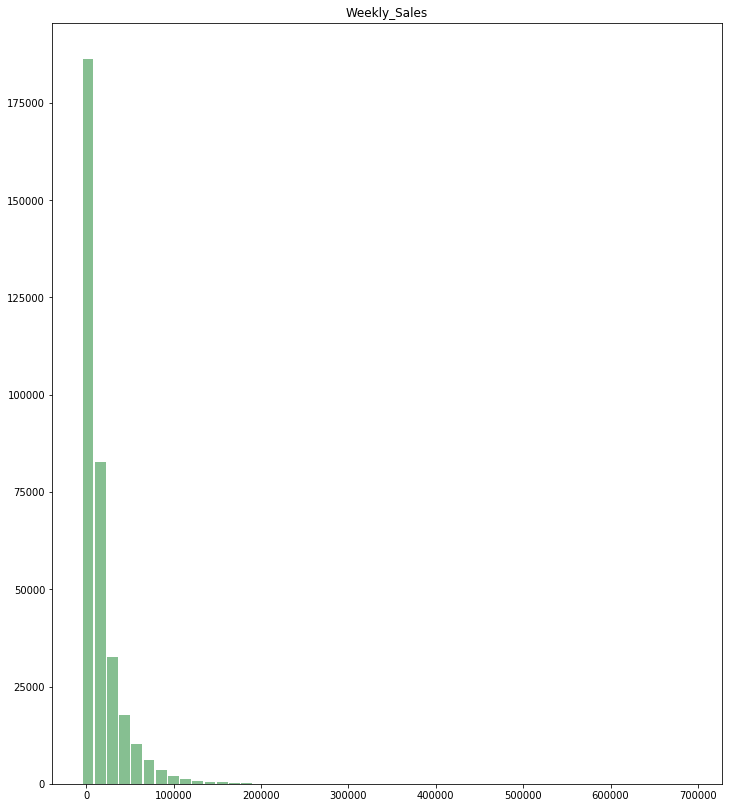

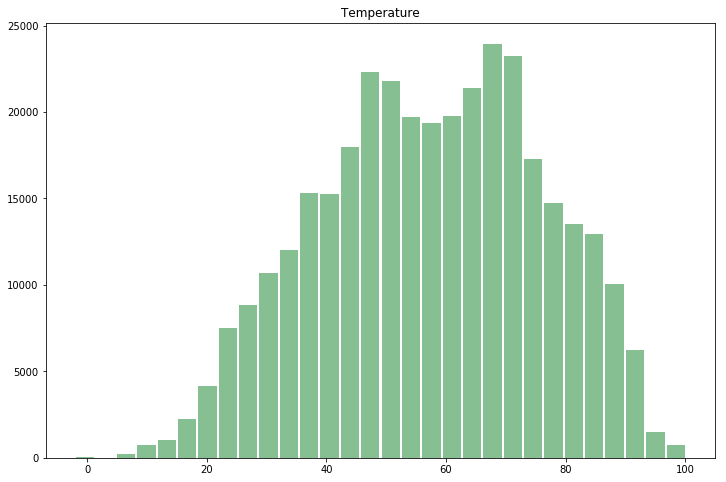

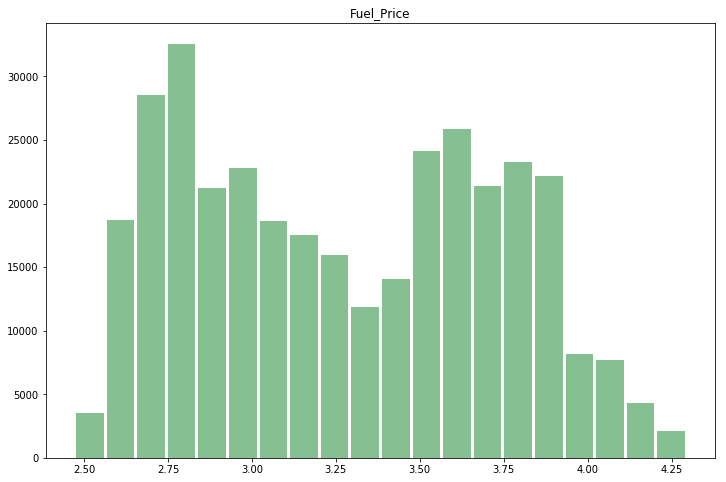

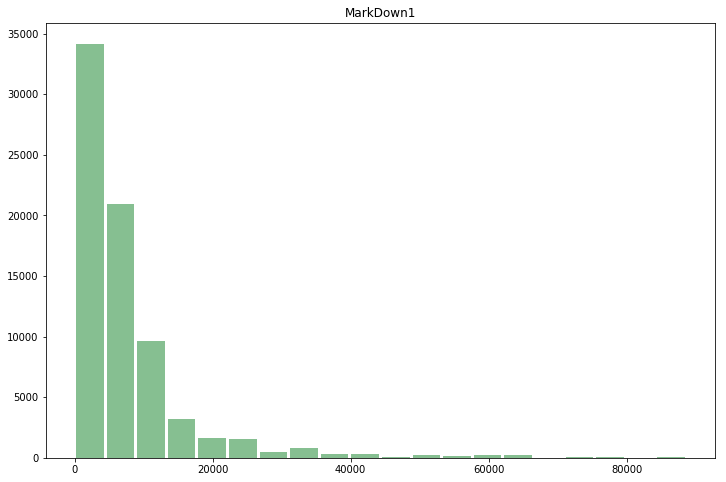

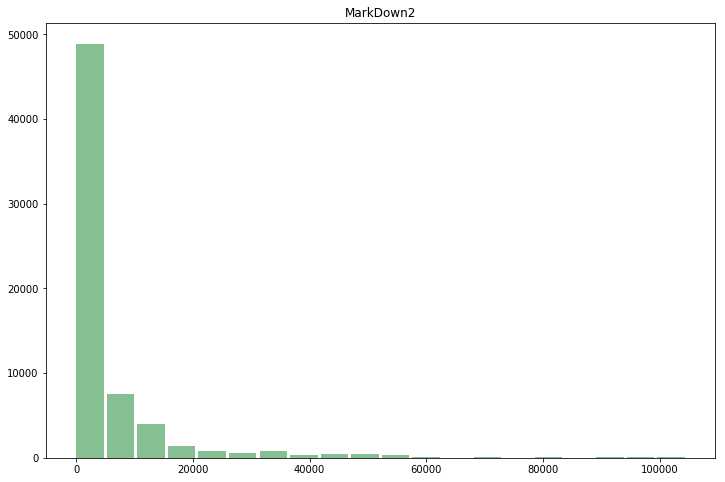

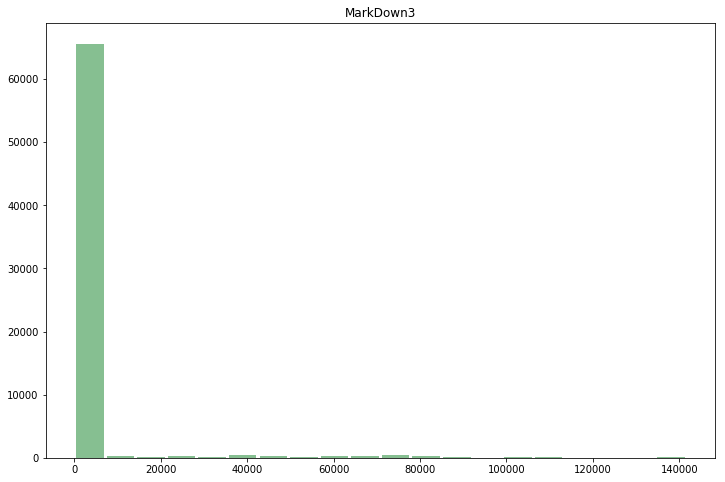

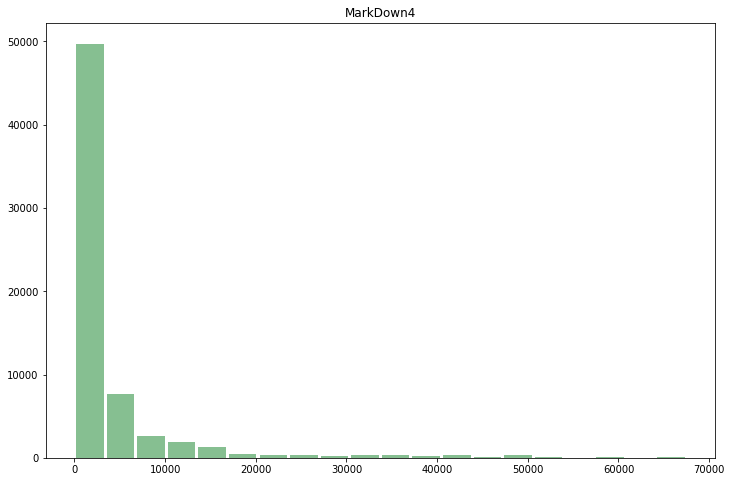

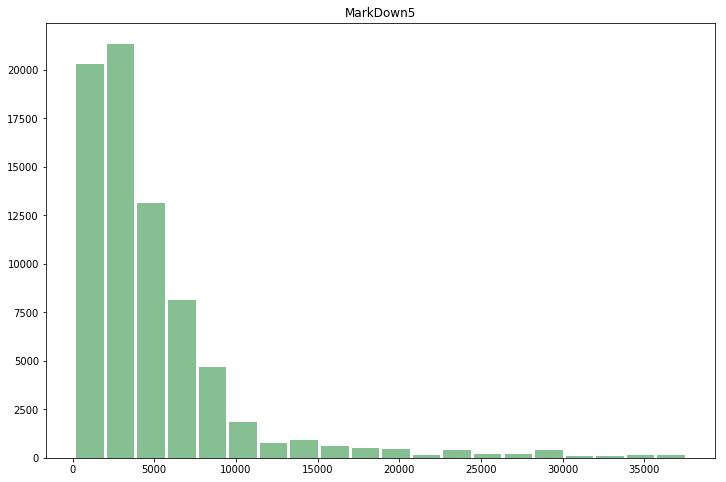

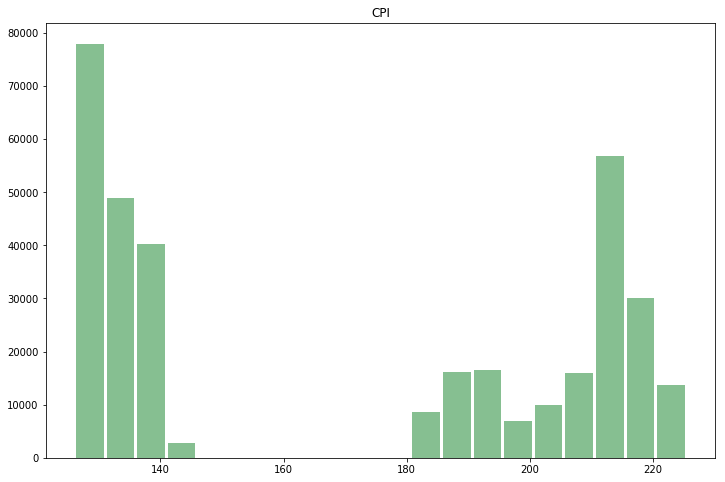

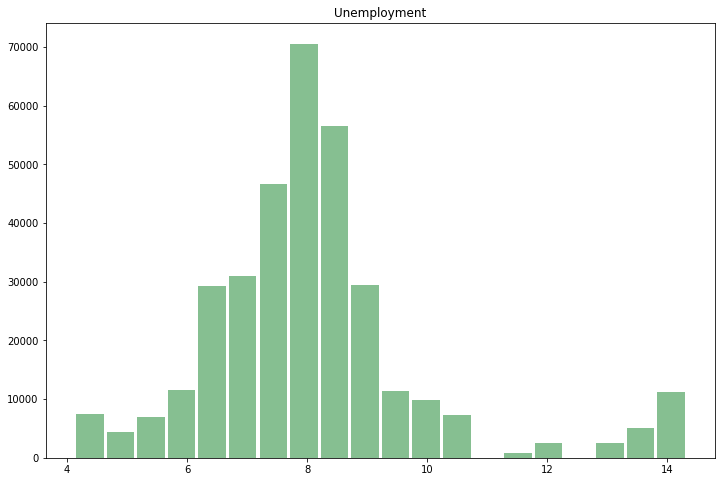

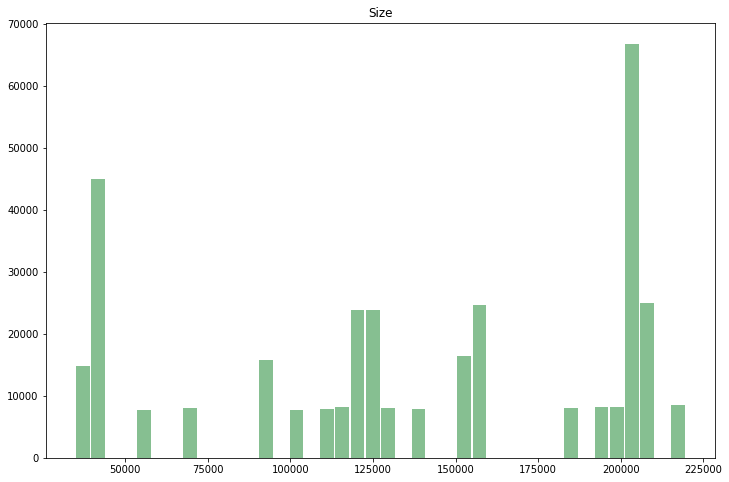

In [10]:
#Data Viz of Continous Vars
#wanted to experiment with different bin sizes so did not use loop to genreate all

df.hist(column='Weekly_Sales', bins=50, grid=False, figsize=(12,14), color='#86bf91', zorder=2, rwidth=0.9)

df.hist(column='Temperature', bins=30, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

df.hist(column='Fuel_Price', bins=20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


df.hist(column='MarkDown1', bins=20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
df.hist(column='MarkDown2', bins=20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
df.hist(column='MarkDown3', bins=20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
df.hist(column='MarkDown4', bins=20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
df.hist(column='MarkDown5', bins=20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

df.hist(column='CPI', bins=20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

df.hist(column='Unemployment', bins=20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

df.hist(column='Size', bins=40, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

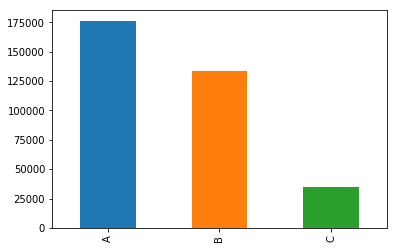

In [8]:
#Data Viz for categorical Type
df['Type'].value_counts().plot(kind='bar')

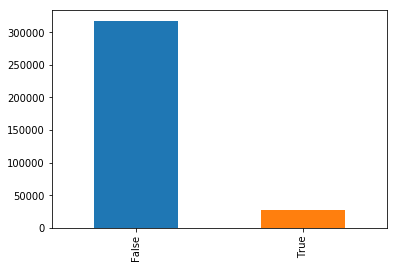

In [9]:
#data Viz for Boolean IsHoliday
df['IsHoliday'].value_counts().plot(kind='bar')

# Data Manipulation

In [11]:
#Transform Store_Dept var, seperate the store and department into sperate vars
df['Store_Dept'] = df['Store_Dept'].astype('str')
df_test['Store_Dept'] = df_test['Store_Dept'].astype('str')

# new data frame with split value columns 
new = df["Store_Dept"].str.split("_", expand = True) 
new_test = df_test["Store_Dept"].str.split("_", expand = True) 

# making separate column from new data frame 
df["Store"]= new[0] 
df["Dept"]= new[1] 

df_test["Store"]= new_test[0] 
df_test["Dept"]= new_test[1]

#drop old column
df.drop(columns =["Store_Dept"], inplace = True) 
df_test.drop(columns =["Store_Dept"], inplace = True) 

In [12]:
#Transform Date var - seperate into year, month, time of month 
df['Date'] = df['Date'].astype('str')
df_test['Date'] = df_test['Date'].astype('str')

# new data frame with split value columns
date = df["Date"].str.split("/", n=2,  expand = True) 
date_test = df_test["Date"].str.split("/", n=2,  expand = True)

# making separate column from new data frame 
df["Month"]= date[0] 
df["Day"]= date[1]
df["Year"]= date[2]

df_test["Month"]= date_test[0] 
df_test["Day"]= date_test[1]
df_test["Year"]= date_test[2]

#drop old column
df.drop(columns =["Date"], inplace = True) 
df_test.drop(columns =["Date"], inplace = True) 

In [13]:
#Assign the range of 31 days into weekly bins 
#(may or may not be useful but trying to keep all info from original Date variable)
#caputre trends that may exist with early, mid, late month, (ex. payday the 1st and 15th for a lot of people)
df['Day'] = df['Day'].astype('int')
bins = [0, 7, 14, 21, 28, 31]
labels = ['1st_week', '2nd_week', '3rd_week', '4th_week', 'last_3_days']
df['part_of_month'] = pd.cut(df['Day'], right=True, bins=bins, labels=labels)

df_test['Day'] = df_test['Day'].astype('int')
df_test['part_of_month'] = pd.cut(df_test['Day'], right=True, bins=bins, labels=labels)

#drop old column
df.drop(columns =["Day"], inplace = True) 
df_test.drop(columns =["Day"], inplace = True)

In [14]:
#assign data types
df['IsHoliday'] = pd.Categorical(df['IsHoliday'])
df['Type'] = pd.Categorical(df['Type'])
df['Store'] = pd.Categorical(df['Store'])
df['Dept'] = pd.Categorical(df['Dept'])
df['Month'] = pd.Categorical(df['Month'])
df['Year'] = pd.Categorical(df['Year'])

df_test['IsHoliday'] = pd.Categorical(df_test['IsHoliday'])
df_test['Type'] = pd.Categorical(df_test['Type'])
df_test['Store'] = pd.Categorical(df_test['Store'])
df_test['Dept'] = pd.Categorical(df_test['Dept'])
df_test['Month'] = pd.Categorical(df_test['Month'])
df_test['Year'] = pd.Categorical(df_test['Year'])


In [15]:
#check training data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344667 entries, 0 to 344666
Data columns (total 18 columns):
Weekly_Sales     344667 non-null float64
IsHoliday        344667 non-null category
Temperature      344667 non-null float64
Fuel_Price       344667 non-null float64
MarkDown1        74187 non-null float64
MarkDown2        66068 non-null float64
MarkDown3        68659 non-null float64
MarkDown4        66394 non-null float64
MarkDown5        74529 non-null float64
CPI              344667 non-null float64
Unemployment     344667 non-null float64
Type             344667 non-null category
Size             344667 non-null int64
Store            344667 non-null category
Dept             344667 non-null category
Month            344667 non-null category
Year             344667 non-null category
part_of_month    344667 non-null category
dtypes: category(7), float64(10), int64(1)
memory usage: 31.2 MB


#### Test Set

In [17]:
#check testing data 
print(df_test.info())
print(df_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76903 entries, 0 to 76902
Data columns (total 18 columns):
Weekly_Sales     76903 non-null float64
IsHoliday        76903 non-null category
Temperature      76903 non-null float64
Fuel_Price       76903 non-null float64
MarkDown1        76494 non-null float64
MarkDown2        45180 non-null float64
MarkDown3        68432 non-null float64
MarkDown4        68573 non-null float64
MarkDown5        76903 non-null float64
CPI              76903 non-null float64
Unemployment     76903 non-null float64
Type             76903 non-null category
Size             76903 non-null int64
Store            76903 non-null category
Dept             76903 non-null category
Month            76903 non-null category
Year             76903 non-null category
part_of_month    76903 non-null category
dtypes: category(7), float64(10), int64(1)
memory usage: 7.0 MB
None
(76903, 18)


# Imputation Test/Train Split

In [18]:
from sklearn.model_selection import train_test_split
import numpy as np

In [17]:
###installing fancyimpute...had some trouble but eventually works (need MS visual C++ >14.0 as well)
#!pip install --upgrade setuptools
#!pip list --outdated
#!pip install numpy -U --user
#!conda install ecos  
#!conda install CVXcanon 
#!pip install fancyimpute --user


In [15]:
#confirming path 
import sys; print(sys.path)

['C:\\Users\\rbart\\Google Drive\\ML\\python', 'D:\\Users\\rbart\\Anaconda3\\python37.zip', 'D:\\Users\\rbart\\Anaconda3\\DLLs', 'D:\\Users\\rbart\\Anaconda3\\lib', 'D:\\Users\\rbart\\Anaconda3', '', 'C:\\Users\\rbart\\AppData\\Roaming\\Python\\Python37\\site-packages', 'D:\\Users\\rbart\\Anaconda3\\lib\\site-packages', 'D:\\Users\\rbart\\Anaconda3\\lib\\site-packages\\win32', 'D:\\Users\\rbart\\Anaconda3\\lib\\site-packages\\win32\\lib', 'D:\\Users\\rbart\\Anaconda3\\lib\\site-packages\\Pythonwin', 'D:\\Users\\rbart\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\rbart\\.ipython']


In [19]:
#keeping column labels for imputation...fancy impute needs an array and will lose labels
#only needed one of these on second look
df_train_numeric_for_labels = df.select_dtypes(include=[np.float])

df_test_numeric_for_labels = df_test.select_dtypes(include=[np.float])

In [20]:
#Tried to impute Markdown columns using KNN, did not have enough memory, so using SoftImpute 
#SoftImpute = Matrix completion by iterative soft thresholding of SVD decompositions
import fancyimpute as fp
from fancyimpute import KNN
from fancyimpute import SoftImpute

df_train_numeric = df.select_dtypes(include=[np.float]).as_matrix()
df_complete1=pd.DataFrame(SoftImpute().fit_transform(df_train_numeric), columns=df_train_numeric_for_labels.columns, index =df_train_numeric_for_labels.index)



Using TensorFlow backend.
D:\Users\rbart\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


[SoftImpute] Max Singular Value of X_init = 16414682.570277
[SoftImpute] Iter 1: observed MAE=178.328430 rank=6
[SoftImpute] Iter 2: observed MAE=178.266922 rank=6
[SoftImpute] Iter 3: observed MAE=178.216489 rank=6
[SoftImpute] Iter 4: observed MAE=178.175948 rank=6
[SoftImpute] Iter 5: observed MAE=178.143513 rank=6
[SoftImpute] Iter 6: observed MAE=178.118129 rank=6
[SoftImpute] Iter 7: observed MAE=178.098857 rank=6
[SoftImpute] Iter 8: observed MAE=178.085004 rank=6
[SoftImpute] Iter 9: observed MAE=178.075976 rank=6
[SoftImpute] Iter 10: observed MAE=178.071177 rank=6
[SoftImpute] Iter 11: observed MAE=178.070027 rank=6
[SoftImpute] Iter 12: observed MAE=178.072021 rank=6
[SoftImpute] Iter 13: observed MAE=178.076773 rank=6
[SoftImpute] Iter 14: observed MAE=178.083604 rank=6
[SoftImpute] Iter 15: observed MAE=178.092406 rank=6
[SoftImpute] Iter 16: observed MAE=178.102905 rank=6
[SoftImpute] Iter 17: observed MAE=178.114908 rank=6
[SoftImpute] Iter 18: observed MAE=178.128019 ra

In [21]:
#impute test set

df_test_numeric = df_test.select_dtypes(include=[np.float]).as_matrix()
df_test_complete1=pd.DataFrame(SoftImpute().fit_transform(df_test_numeric), columns=df_test_numeric_for_labels.columns, index =df_test_numeric_for_labels.index)

D:\Users\rbart\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


[SoftImpute] Max Singular Value of X_init = 7734059.418805
[SoftImpute] Iter 1: observed MAE=158.456237 rank=4
[SoftImpute] Iter 2: observed MAE=158.705459 rank=4
[SoftImpute] Iter 3: observed MAE=158.792874 rank=4
[SoftImpute] Iter 4: observed MAE=158.828245 rank=4
[SoftImpute] Iter 5: observed MAE=158.845851 rank=4
[SoftImpute] Iter 6: observed MAE=158.856458 rank=4
[SoftImpute] Iter 7: observed MAE=158.863679 rank=4
[SoftImpute] Iter 8: observed MAE=158.868965 rank=4
[SoftImpute] Iter 9: observed MAE=158.872971 rank=4
[SoftImpute] Iter 10: observed MAE=158.876058 rank=4
[SoftImpute] Iter 11: observed MAE=158.878461 rank=4
[SoftImpute] Iter 12: observed MAE=158.880350 rank=4
[SoftImpute] Iter 13: observed MAE=158.881839 rank=4
[SoftImpute] Iter 14: observed MAE=158.883018 rank=4
[SoftImpute] Iter 15: observed MAE=158.883956 rank=4
[SoftImpute] Iter 16: observed MAE=158.884711 rank=4
[SoftImpute] Iter 17: observed MAE=158.885317 rank=4
[SoftImpute] Iter 18: observed MAE=158.885807 ran

In [22]:
df_complete1.head()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,24924.50,42.31,2.572,1875.338948,1311.898266,1034.459570,691.021254,1583.389043,211.096358,8.106
1,46039.49,38.51,2.548,3455.384519,2418.206570,1908.420652,1275.258195,2916.241549,211.242170,8.106
2,41595.55,39.93,2.514,3122.852871,2185.374002,1724.486474,1152.298193,2635.734995,211.289143,8.106
3,19403.54,46.63,2.561,1462.252977,1022.654518,805.957900,538.262932,1234.936556,211.319643,8.106
4,21827.90,46.50,2.625,1643.673312,1149.679488,906.304666,605.343469,1387.974890,211.350143,8.106


In [23]:
df_test_complete1.head()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,17147.44,75.55,3.749,21290.13,161.163682,69.89,4977.35,3261.04,221.671800,7.143
1,18164.20,73.77,3.688,8351.40,87.812990,10.52,2443.14,3127.88,221.725663,7.143
2,18517.79,70.33,3.630,6154.14,83.533406,45.11,1675.49,5508.18,221.742674,7.143
3,16963.55,77.22,3.561,4039.39,62.723195,745.19,1429.96,3631.13,221.744944,7.143
4,16065.49,77.95,3.501,6086.21,12.000000,370.51,148.75,3690.85,221.747214,7.143


#### Training DataSet A - dropped MarkDown

In [24]:
#DataSet A - dropping MarkDown due to having over 50% of data missing
df_drop = df.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])


#dummy coding for categorical vars
df_encode = pd.get_dummies(df_drop)
print(df_encode.shape)

(344667, 157)


In [25]:
#create dependent and independent vars
X = df_encode .drop(columns=['Weekly_Sales'])
y = df_encode [['Weekly_Sales']]

print(X.shape)
print(type(X))

print(y.shape)
print(type(y))

(344667, 156)
<class 'pandas.core.frame.DataFrame'>
(344667, 1)
<class 'pandas.core.frame.DataFrame'>


#### Training DataSet B - imputed Markdown

In [26]:
#DataSet B - MarkDown values imputed using SoftImpute
#Drop continuous vars from original dataframe then reaatach the dataframe that has the imputed values
df_drop_setB = df.drop(columns=['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 
                                'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'])

#df_complete1 is the dataframe w/ imputed vars
df_complete = df_complete1.join(df_drop_setB)

In [27]:
#dummy coding for categorical vars
df_B = pd.get_dummies(df_complete)
print(df_B.shape)

(344667, 162)


In [28]:
#create dependent and independent vars
X1 = df_B .drop(columns=['Weekly_Sales'])
y1 = df_B [['Weekly_Sales']]

print(X1.shape)
print(type(X1))

print(y1.shape)
print(type(y1))

(344667, 161)
<class 'pandas.core.frame.DataFrame'>
(344667, 1)
<class 'pandas.core.frame.DataFrame'>


In [29]:
#test/train split A
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)


#test/train split B
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

print(X_train1.shape)
print(y_train1.shape)

(275733, 156)
(275733, 1)
(275733, 161)
(275733, 1)


# Supervised - Regression

In [30]:
import statsmodels.api as sm
#using statsmodel initially just to get some easy model statistics 
#ran once with DataSet A then once with Dataset B 
#imputed DataSet B had higher adjuste R^2 and all MarkDowns are significant
#DataSetB with imputed 
X2 = sm.add_constant(X_train1)
est = sm.OLS(y_train1, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     3985.
Date:                Tue, 29 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:21:14   Log-Likelihood:            -2.9994e+06
No. Observations:              275733   AIC:                         5.999e+06
Df Residuals:                  275581   BIC:                         6.001e+06
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Regression

In [92]:
# Regression model with 10 fold CV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Linear Regression")
lr = LinearRegression()
scoring = ['r2', 'neg_mean_squared_error']
scores = cross_validate(lr, X_train1, y_train1, cv=10, scoring=scoring)
print("Neg Mean Squared Error:", scores['test_neg_mean_squared_error'].mean()) 
print("r2:", scores['test_r2'].mean()) 

#lr = lr.fit(X_train1, y_train1)
#y_pred = lr.predict(X_test1)

Linear Regression
Neg Mean Squared Error: -164648749.22178832
r2: 0.6856308193758042


In [112]:
# Regression performance on 20% Test Split
#CV produces similar results 
lr1 = lr.fit(X_train1, y_train1)
print("Residual sum of squares: %.2f"
      % np.mean((lr1.predict(X_test1) - y_test1) ** 2))

Residual sum of squares: 164642254.64


#### Knn-regression


In [106]:
#find optimal K 
# I know this doesn't make a lot of sense to do this 
#then use CV, but it was taking way too long to 
#run on my pc trying to find best K while also using CV (20 simulations versus 200)

error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train1, y_train1)
    pred_i = knn.predict(X_test1)
    error.append(np.mean(pred_i - y_test1) ** 2)

Text(0, 0.5, 'Mean Error')

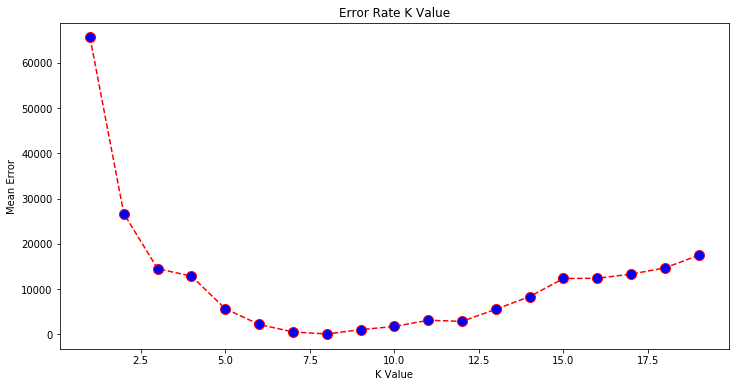

In [108]:
#plot Ks to find optimal value, ends up at 8
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [110]:
#KNN-Regression Model with CV with optimal K
from sklearn import neighbors
print("KNN-Regression")
knn_regression = neighbors.KNeighborsRegressor(n_neighbors=8, weights='uniform')
scores1 = cross_validate(knn_regression, X_train1, y_train1, cv=10, scoring=scoring)
print("Neg Mean Squared Error:", scores1['test_neg_mean_squared_error'].mean()) 
print("r2:", scores1['test_r2'].mean()) 

KNN-Regression
Neg Mean Squared Error: -116902281.82887597
r2: 0.7767700451059156


In [222]:
#Knn-Regression performance on 20% Test split
knnr = knn_regression.fit(X_train1, y_train1)
print("Residual sum of squares: %.2f"
      % np.mean((knnr.predict(X_test1) - y_test1) ** 2))

Residual sum of squares: 116784190.27


#### feature selection

In [30]:
#Feature selection using p-values threshold .05
#only Month_12 and part_of_month_last_3_days not significant
#df_B is the original dataframe after feature engineering and imputation

df_B1 = df_B.drop(columns=['Month_12' , 'part_of_month_last_3_days'])

#create dependent and independent vars
X_fs = df_B1 .drop(columns=['Weekly_Sales'])
y_fs = df_B1 [['Weekly_Sales']]

#test/train split for feature selection
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_fs, y_fs, test_size=0.2, random_state=42)

print(X_train2.shape)
print(y_train1.shape)

(275733, 159)
(275733, 1)


In [134]:
#Knn-Regression w/ feature selection using 20% Test set
knnr1 = knn_regression.fit(X_train2, y_train2)
print("Residual sum of squares: %.2f"
      % np.mean((knnr1.predict(X_test2) - y_test2) ** 2))
print("R2:", r2_score(y_test2, knn_regression.predict(X_test2)))

Residual sum of squares: 116784190.13
R2: 0.7750542615808467


In [136]:
# Regression w/ feature selection using 20% Test Set
lr2 = lr.fit(X_train2, y_train2)
print("Residual sum of squares: %.2f"
      % np.mean((lr2.predict(X_test2) - y_test2) ** 2))
print("R2:", r2_score(y_test2, lr.predict(X_test2)))

Residual sum of squares: 164642254.64
R2: 0.6828716840542219


## Test Set (Separate CSV)

In [31]:
#Formatting Test Set
#df_test is the formatted completely separate csv files (from imputation section)
#Drop continuous vars from original dataframe then re-aatach imputed conitinous vars (same process as training set)

df_drop_test = df_test.drop(columns=['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 
                                'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'])

#df_complete1 is the dataframe of continous vars after imputation (see imputation section)
df_test_complete = df_test_complete1.join(df_drop_test)
df_test_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76903 entries, 0 to 76902
Data columns (total 18 columns):
Weekly_Sales     76903 non-null float64
Temperature      76903 non-null float64
Fuel_Price       76903 non-null float64
MarkDown1        76903 non-null float64
MarkDown2        76903 non-null float64
MarkDown3        76903 non-null float64
MarkDown4        76903 non-null float64
MarkDown5        76903 non-null float64
CPI              76903 non-null float64
Unemployment     76903 non-null float64
IsHoliday        76903 non-null category
Type             76903 non-null category
Size             76903 non-null int64
Store            76903 non-null category
Dept             76903 non-null category
Month            76903 non-null category
Year             76903 non-null category
part_of_month    76903 non-null category
dtypes: category(7), float64(10), int64(1)
memory usage: 7.0 MB


In [32]:
#dummy coding for test file categorical vars
df_test_encode = pd.get_dummies(df_test_complete)
print(df_test_encode.shape)

(76903, 154)


In [185]:
#unfortuantely not all of the columns exist in the Test data
#compare this list to training set list of columns
for col in df_test_encode.columns: 
    print(col) 

Weekly_Sales
Temperature
Fuel_Price
MarkDown1
MarkDown2
MarkDown3
MarkDown4
MarkDown5
CPI
Unemployment
Size
IsHoliday_False
IsHoliday_True
Type_A
Type_B
Type_C
Store_1
Store_10
Store_11
Store_12
Store_13
Store_14
Store_15
Store_16
Store_17
Store_18
Store_19
Store_2
Store_20
Store_21
Store_22
Store_23
Store_24
Store_25
Store_26
Store_27
Store_28
Store_29
Store_3
Store_30
Store_31
Store_32
Store_33
Store_34
Store_35
Store_36
Store_37
Store_38
Store_39
Store_4
Store_40
Store_41
Store_42
Store_43
Store_44
Store_45
Store_5
Store_6
Store_7
Store_8
Store_9
Dept_1
Dept_10
Dept_11
Dept_12
Dept_13
Dept_14
Dept_16
Dept_17
Dept_18
Dept_19
Dept_2
Dept_20
Dept_21
Dept_22
Dept_23
Dept_24
Dept_25
Dept_26
Dept_27
Dept_28
Dept_29
Dept_3
Dept_30
Dept_31
Dept_32
Dept_33
Dept_34
Dept_35
Dept_36
Dept_37
Dept_38
Dept_39
Dept_4
Dept_40
Dept_41
Dept_42
Dept_43
Dept_44
Dept_45
Dept_46
Dept_47
Dept_48
Dept_49
Dept_5
Dept_50
Dept_51
Dept_52
Dept_54
Dept_55
Dept_56
Dept_58
Dept_59
Dept_6
Dept_60
Dept_65
Dept_67
De

In [33]:
#Re-formatting training data 
#drop columns not found in the test data set from the training data set or model will not work
#also drop vars eliminated in feature selection again
#df_B is the training dataframe just after dummy coding w/ imputed data
#Training: assign dependent and independent vars again with re-formatted data
X_1 = df_B .drop(columns=['Weekly_Sales', 'Month_1', 'Month_11', 'Month_12', 'Month_2', 'Month_3', 'Month_4', 
                          'Year_10', 'Year_11', 'part_of_month_last_3_days'])
y_1 = df_B [['Weekly_Sales']]


#Test:assing dependent and independent vars
X_test_1= df_test_encode .drop(columns=['Weekly_Sales', 'part_of_month_last_3_days'])
y_test_1 = df_test_encode [['Weekly_Sales']]

In [34]:
#check shape
print(X_test_1.shape)
print(X_1.shape)

print(y_test_1.shape)
print(y_1.shape)

(76903, 152)
(344667, 152)
(76903, 1)
(344667, 1)


In [38]:
from sklearn import neighbors
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#Knn-Regression w/  Test set (seperate csv)
#Ouch Serious overfitting
knn_regression = neighbors.KNeighborsRegressor(n_neighbors=8, weights='uniform')
knr = knn_regression.fit(X_1, y_1)
print("Residual sum of squares: %.2f"
      % np.mean((knr.predict(X_test_1) - y_test_1) ** 2))
print("R2:", r2_score(y_test_1, knn_regression.predict(X_test_1)))

Residual sum of squares: 491206377.45
R2: -0.011834702822332233


In [40]:
#re-run knn loop with true test data since results were so poor

error_test = []
# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn_test = neighbors.KNeighborsRegressor(n_neighbors=i)
    knn_test.fit(X_1, y_1)
    pred_i = knn_test.predict(X_test_1)
    error_test.append(np.mean(pred_i - y_test_1) ** 2)

Text(0, 0.5, 'Mean Error')

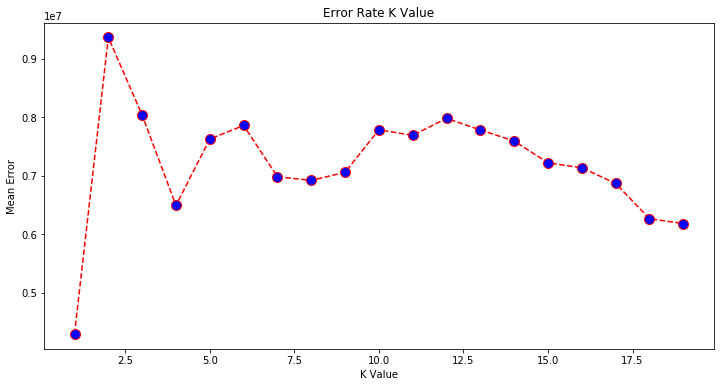

In [41]:
#plot Ks to find optimal value, ends up at 8
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error_test, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [42]:
#Knn-Regression w/  Test set (seperate csv)
#trying with new optimal K but results are still very poor 

knn_regression = neighbors.KNeighborsRegressor(n_neighbors=20, weights='uniform')
knr = knn_regression.fit(X_1, y_1)
print("Residual sum of squares: %.2f"
      % np.mean((knr.predict(X_test_1) - y_test_1) ** 2))
print("R2:", r2_score(y_test_1, knn_regression.predict(X_test_1)))

Residual sum of squares: 499028795.40
R2: -0.02794808062375309


In [192]:
# Regression w/ feature selection using true Test Set (seperate csv)
lr_test = lr.fit(X_1, y_1)
print("Residual sum of squares: %.2f"
      % np.mean((lr_test.predict(X_test_1) - y_test_1) ** 2))
print("R2:", r2_score(y_test_1, lr.predict(X_test_1)))

Residual sum of squares: 213609275.63
R2: 0.5599868245740638


In [194]:
#Check a lasso regression to see if it provides better results
#performs automatic feature selection  
from sklearn.linear_model import LassoCV
l1_cv = LassoCV(cv=5, max_iter=100000, alphas=np.linspace(0.1,1000,100))
lasso = l1_cv.fit(X_1, y_1)

C:\Users\rbart\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rbart\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22440383965386.816, tolerance: 13889150166.42255
  tol, rng, random, positive)
C:\Users\rbart\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19553065302036.523, tolerance: 13324979184.45765
  tol, rng, random, positive)
C:\Users\rbart\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_desc

In [202]:
#LAsso reults
#slightly imporved over regression, but nothing significant
print("R2:", r2_score(y_test_1, lasso.predict(X_test_1)))
print("MSE:", mean_squared_error(y_test_1, lasso.predict(X_test_1)))

R2: 0.5650814913649708
MSE: 211136013.14195082
